In [1]:
import pandas as pd

In [2]:
#data = pd.read_csv('all-data.csv' , names = ['sentiment','text'] , sep = ',',encoding_errors= 'replace')

In [3]:
data = pd.read_csv('train.csv' , encoding_errors= 'replace')

In [4]:
data.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km�),Density (P/Km�)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [5]:
data = data.drop(columns= ['textID','text','Time of Tweet','Age of User','Country','Population -2020','Land Area (Km�)','Density (P/Km�)'])

In [6]:
data.tail()

,selected_text,sentiment
27476,d lost,negative
27477,", don`t force",negative
27478,Yay good for both of you.,positive
27479,But it was worth it ****.,positive
27480,All this flirting going on - The ATG smiles. Y...,neutral


In [7]:
len(data)

27481

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
data['sentiment'] = LabelEncoder().fit_transform(data['sentiment'])

In [10]:
data.head()

,selected_text,sentiment
0,"I`d have responded, if I were going",1
1,Sooo SAD,0
2,bullying me,0
3,leave me alone,0
4,"Sons of ****,",0


In [11]:
import re
import string
import nltk
from nltk.corpus import stopwords
'''
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    # Remove numbers (optional)
    text = re.sub(r'\d+', '', text)
    # Remove stop words
    stop_words = set(nltk.corpus.stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    # Lemmatize
    lemmatizer = nltk.stem.WordNetLemmatizer()
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())
    return text
    '''

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\bolua\AppData\Local\Temp\ipykernel_19488\4150750057.py:5: SyntaxWarning: invalid escape sequence '\d'
  '''


'\ndef preprocess_text(text):\n    # Lowercase the text\n    text = text.lower()\n    # Remove punctuation\n    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)\n    # Remove numbers (optional)\n    text = re.sub(r\'\\d+\', \'\', text)\n    # Remove stop words\n    stop_words = set(nltk.corpus.stopwords.words(\'english\'))\n    text = \' \'.join(word for word in text.split() if word not in stop_words)\n    # Lemmatize\n    lemmatizer = nltk.stem.WordNetLemmatizer()\n    text = \' \'.join(lemmatizer.lemmatize(word) for word in text.split())\n    return text\n    '

In [12]:


def clean_tweet(tweet):
    if isinstance(tweet, str):  # Check if tweet is a string
        tweet = tweet.lower()  # Lowercase the text
        tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)  # Remove URLs
        tweet = re.sub(r'\@\w+|\#', '', tweet)  # Remove mentions and hashtags
        # Add any other cleaning steps you want here
    else:
        tweet = ''  # You can set it to an empty string or handle it as needed
    return tweet


In [13]:
data = data.rename(columns = {'selected_text':'text'})

In [14]:
data.head()

,text,sentiment
0,"I`d have responded, if I were going",1
1,Sooo SAD,0
2,bullying me,0
3,leave me alone,0
4,"Sons of ****,",0


In [15]:

data['text'] = data['text'].apply(clean_tweet)

In [16]:
data.head()

,text,sentiment
0,"i`d have responded, if i were going",1
1,sooo sad,0
2,bullying me,0
3,leave me alone,0
4,"sons of ****,",0


In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [18]:
tokenizer = Tokenizer(num_words=5000 , oov_token='<OOV>')

In [19]:
tokenizer.fit_on_texts(data['text'])

In [20]:
sequences = tokenizer.texts_to_sequences(data['text'])

In [21]:
padded_seq = pad_sequences(sequences,maxlen=50 , padding= 'post')

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(padded_seq, data['sentiment'], test_size=0.33, random_state=42)

In [24]:
from tensorflow.keras.layers import LSTM,Dense,Dropout,Embedding,Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [25]:
model = Sequential()

In [26]:
vocab_size = 5000
Embedding_dim = 64
max_length = 50

In [27]:

# Define the updated model
model = Sequential()

# Add Embedding layer
model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=max_length))

# Add multiple LSTM layers
model.add(Bidirectional(LSTM(128, return_sequences=True)))  # First LSTM layer, return_sequences=True to stack more layers
model.add(Dropout(0.3))  # Dropout to prevent overfitting

model.add(Bidirectional(LSTM(64, return_sequences=True)))  # Second LSTM layer
model.add(Dropout(0.3))

model.add(Bidirectional(LSTM(32)))  # Final LSTM layer
model.add(Dropout(0.3))

# Add the output layer for classification
model.add(Dense(3, activation='softmax'))  # 3 classes for sentiment (positive, neutral, negative)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

c:\Users\bolua\Desktop\allpyproj\large lang mod\cuda\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for multi-class classification
              optimizer=Adam(learning_rate=0.0001),  # Adam optimizer with learning rate
              metrics=['accuracy'])  # Track accuracy

# Show model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
#model.summary()

In [30]:
model.fit(
    X_train , y_train,
    epochs = 17,
    batch_size = 32,
    validation_data = (X_test,y_test)
    
)

Epoch 1/17
576/576 ━━━━━━━━━━━━━━━━━━━━ 58s 84ms/step - accuracy: 0.5141 - loss: 0.9565 - val_accuracy: 0.6505 - val_loss: 0.7455
Epoch 2/17
576/576 ━━━━━━━━━━━━━━━━━━━━ 47s 82ms/step - accuracy: 0.7108 - loss: 0.6815 - val_accuracy: 0.7756 - val_loss: 0.5931
Epoch 3/17
576/576 ━━━━━━━━━━━━━━━━━━━━ 45s 78ms/step - accuracy: 0.8079 - loss: 0.5294 - val_accuracy: 0.7749 - val_loss: 0.5715
Epoch 4/17
576/576 ━━━━━━━━━━━━━━━━━━━━ 44s 77ms/step - accuracy: 0.8248 - loss: 0.4715 - val_accuracy: 0.8020 - val_loss: 0.5346
Epoch 5/17
576/576 ━━━━━━━━━━━━━━━━━━━━ 49s 84ms/step - accuracy: 0.8464 - loss: 0.4150 - val_accuracy: 0.8137 - val_loss: 0.5158
Epoch 6/17
576/576 ━━━━━━━━━━━━━━━━━━━━ 50s 87ms/step - accuracy: 0.8567 - loss: 0.3801 - val_accuracy: 0.8107 - val_loss: 0.5449
Epoch 7/17
576/576 ━━━━━━━━━━━━━━━━━━━━ 53s 92ms/step - accuracy: 0.8766 - loss: 0.3368 - val_accuracy: 0.7940 - val_loss: 0.5433
Epoch 8/17
576/576 ━━━━━━━━━━━━━━━━━━━━ 50s 87ms/step - accuracy: 0.8847 - loss: 0.3134 - 

In [31]:
import os
import pickle

# Define the directory and filename
directory = './saved_models'
filename = 'tokenizer.pickle'

# Create the directory if it doesn’t exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the tokenizer in the specified directory
with open(os.path.join(directory, filename), 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [97]:
loss = pd.DataFrame(model.history.history)

In [98]:
loss

,accuracy,loss,val_accuracy,val_loss
0,0.561047,0.880965,0.622340,0.788132
1,0.715837,0.669020,0.763370,0.602056
2,0.797523,0.537958,0.787738,0.560201
3,0.824843,0.461107,0.804940,0.512607
4,0.850369,0.400832,0.809902,0.520881
5,0.867967,0.357415,0.824457,0.485662
6,0.879318,0.331124,0.804719,0.522466
7,0.884912,0.311994,0.811997,0.518842
8,0.893656,0.293980,0.791708,0.581038
9,0.897132,0.283774,0.797001,0.543516


<Axes: >

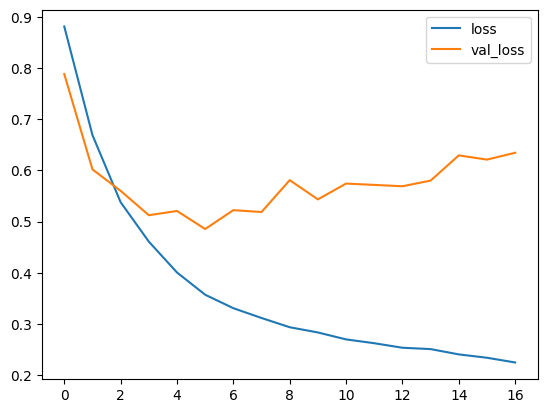

In [99]:
loss[['loss','val_loss']].plot()

In [100]:
loss,accuracy = model.evaluate(X_test,y_test)
print(f'Test accuracy, {accuracy*100:.2f} %')

284/284 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.8081 - loss: 0.5954
Test accuracy, 79.78 %


In [28]:
import tensorflow as tf

# Load the model
model = tf.keras.models.load_model('sentiments_model.h5')



# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model accuracy on test data: {accuracy:.2f}")


284/284 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.8081 - loss: 0.5954
Model accuracy on test data: 0.80


In [101]:
model

<Sequential name=sequential_3, built=True>

In [102]:
data[data['sentiment'] == 1]

,text,sentiment
0,"i`d have responded, if i were going",1
5,- some shameless plugging for the best ranger...,1
7,soooo high,1
8,both of you,1
10,"as much as i love to be hopeful, i reckon the ...",1
...,...,...
27468,"few grilled mushrooms and olives, feta cheese ...",1
27469,94 more days till bh comes back to la,1
27471,"i`m defying gravity. and nobody in alll of oz,...",1
27473,in spoke to you yesterday and u didnt respond ...,1


In [111]:
data.iloc[748]

text         wow-you ride hard!
sentiment                     2
Name: 748, dtype: object

In [104]:
data['text'].iloc[748]

'wow-you ride hard!'

In [105]:
import tensorflow as tf


In [107]:
model.save('sentiments_model.h5')

In [7]:
import numpy as np
import re


def clean_tweet(tweet):
    if isinstance(tweet, str):  # Check if tweet is a string
        tweet = tweet.lower()  # Lowercase the text
        tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)  # Remove URLs
        tweet = re.sub(r'\@\w+|\#', '', tweet)  # Remove mentions and hashtags
        # Add any other cleaning steps you want here
    else:
        tweet = ''  # You can set it to an empty string or handle it as needed
    return tweet

# Example of a new tweet to classify
new_tweet = ['wow-you ride hard!']

new_tweet_cleaned = [clean_tweet(tweet) for tweet in new_tweet]  # Clean the new tweet
new_sequence = tokenizer.texts_to_sequences(new_tweet_cleaned)  # Tokenize the new tweet
new_padded_sequence = pad_sequences(new_sequence, maxlen=50, padding='post')  # Pad it to match the input length

# Get the prediction probabilities for each class (0=negative, 1=neutral, 2=positive)
prediction_probabilities = model.predict(new_padded_sequence)

print(prediction_probabilities)

# Get the predicted class (index with the highest probability)
predicted_class = np.argmax(prediction_probabilities, axis=-1)[0]
print(predicted_class)

# Get the probability of the predicted class
confidence = prediction_probabilities[0][predicted_class]
print(confidence)

# Map the prediction to the corresponding sentiment
sentiment_labels = {0: 'looking bad', 1: 'Neutral', 2: 'sounding good'}

# Define different sentences based on confidence levels
if confidence > 0.85:
    sentence_starters = [
        "I am sure this news is", 
        "Without a doubt, this news is", 
        "I can confidently say this news is"
    ]
elif 0.60 < confidence <= 0.85:
    sentence_starters = [
        "This news seems to be", 
        "It is likely this news is", 
        "I am fairly sure this news is"
    ]
else:
    sentence_starters = [
        "This news might be", 
        "After scanning, it could be that this news is", 
        "I am not entirely sure, but this news appears to be"
    ]

# Randomly select a sentence starter
import random
selected_sentence = random.choice(sentence_starters)

# Output the sentiment with confidence and varied sentences
print(f'{selected_sentence} {sentiment_labels[predicted_class]} with {confidence * 100:.2f}% confidence level.')


NameError: name 're' is not defined